![alt text](https://drive.google.com/uc?export=view&id=1DXUVHxd4t15mfuqMgMCLnsP4jWVI5EWz)

---
<br>
© 2024 Copyright The University of New South Wales - CRICOS 00098G

**Author**: Oscar Perez-Concha: o.perezconcha@unsw.edu.au

**Contributors/Co-authors**: Marta Fredes-Torres, Zhisheng (Sandy) Sa and Matthew Sainsbury-Dale.








---



# Laboratory 4: Single decision trees.



Step 1: Goal/Research question: To build a predictive algorithm to predict (classify) whether a tumour is malignant based on the measurements of the tissue extracted from the breast.

Step 2: Do we have a dataset to answer that question or to at least try to answer that question?
The Wisconsin Breast Cancer dataset contains records of clinical measurements of breast cancer tumors. Each tumor is labeled as “benign” (for harmless tumors) or “malignant” (for cancerous tumors). As stated above, our task is to learn to predict whether a tumor is malignant based on the measurements of the tissue.

![alt text](https://drive.google.com/uc?export=view&id=105SGqeyo8RgLhSO8mN7ZE5OsG0YiLPKt)

# 1. Introduction

In this exercise, we will introduce single decision trees.

## 1.1. Aims of the Exercise:
 1. To introduce the single decision tree
 2. To explore hyperparameters and determine appropriate choices.


It aligns with all of the learning outcomes of our course:

1.	Distinguish a range of task specific machine learning techniques appropriate for Health Data Science.
2.	Design machine learning tasks for Health Data Science scenarios.



---





---



# 2. Initial Docstring:


All programs should have an initial docstring comment. It must include at least the following elements:

* Purpose: what is the aim of your code?
* Date created
* Author
* Date modified
* Author of the modification
* Method: how did you go about solving the problem?
* Data dictionary: The data dictionary should contain all the important variables and constants defined, their datatype (float, string, int) and a short description of what they are.
* List and defintions of functions: similar to the data dictionary, but with functions.
* List of libraries: libraries used in the program and their functionality.

Is there anything else you think we should include in the docstring? Please comment in the comments section of this week's laboratory.

Please read these two documents:
1. pandas docstring guide: https://pandas.pydata.org/pandas-docs/version/0.23/contributing_docstring.html
2. Style guide: https://www.cse.unsw.edu.au/~en1811/resources/style.html


<b> Docstring:</b>
#####################################################################################################################



#####################################################################################################################

Variables:

cancer: dataframe that contains our Wisconsin Breast Cancer



---





---



# 3. Exploration of the Wisconsin Cancer Data Set

Read the data dictionary and more information [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))

![alt text](https://drive.google.com/uc?export=view&id=1gEuEsg6xZIAErGNiEj2QctybNiXKl3a9)
![alt text](https://drive.google.com/uc?export=view&id=1tIfc3IIwDjboD3YpbmhXRbgOBxSv3M3A)
![alt text](https://drive.google.com/uc?export=view&id=1bgQF4oo6BlIe21jIUGWbhEkhzpNbhbqn)
![alt text](https://drive.google.com/uc?export=view&id=18jDQmeiDk_z06et2HIgCs9Owwddt_oCh)



---



In [1]:
# Insert your comments and explanations

# Add your code or enhance the existing one

# This means that every part of the program must be commented on,
# and the rationale behind your code must be explained.
# Please remember to comment your code thoroughly, though I won't repeat the last two lines.

import sys
import numpy as np
import pandas as pd


In [3]:
# Insert your comments and explanations

# Add your code or enhance the existing one



# Mount Google Drive
# We do not need to run this cell if you are not running this notebook in Google Colab

if 'google.colab' in str(get_ipython()):
    from google.colab import drive # import drive from Gogle colab
    root = '/content/drive'     # default location for the drive
    # print(root)                 # print content of ROOT (Optional)
    drive.mount(root)
else:
    print('Not running on CoLab')

Mounted at /content/drive


In [4]:
# Insert your comments and explanations

# Add your code or enhance the existing one


from pathlib import Path

if 'google.colab' in str(get_ipython()):
    # EDIT THE PROJECT PATH IF DIFFERENT WITH YOUR ONE
    # You may need to change 'MyDrive' to 'My Drive'.
    project_path = Path(root) / 'MyDrive' / 'Colab Notebooks' / 'HDAT9500' / 'Week4'

    # OPTIONAL - set working directory according to your google drive project path
    # import os
    # Change directory to the location defined in project_path
    # os.chdir(project_path)
else:
    project_path = Path()



---





---



### <font color='blue'>  3.1. Load the dataset and carry out preliminary checks and cleaning. </font>

See below some suggestions:

In [6]:
# Insert your comments and explanations

# Add your code

# Name the dataframe that will contain the dataset "cancer"

cancer = pd.read_csv(project_path / 'Breast-Cancer-Wisconsin.csv')



---





---



### <font color='blue'> 3.2. Summary statistics for diagnoses, divided into benign and malignant categories. </font>



In [12]:
# Insert your comments and explanations

# Add your code
print(cancer.shape)
cancer.head(n=20)

# Check for unique IDs
unique_ids = cancer['id'].is_unique
print(f"Are all IDs unique? {unique_ids}")
#

(569, 32)
Are all IDs unique? True




---



In [10]:
# Divide the dataset into benign and malignant categories
benign = cancer[cancer['diagnosis'] == 'B']
malignant = cancer[cancer['diagnosis'] == 'M']

# Calculate summary statistics for benign cases
benign_stats = benign.describe()

# Calculate summary statistics for malignant cases
malignant_stats = malignant.describe()

# Display the summary statistics
print("Summary statistics for benign cases:")
print(benign_stats)

print("\nSummary statistics for malignant cases:")
print(malignant_stats)

Summary statistics for benign cases:
                 id  radius_mean  texture_mean  perimeter_mean   area_mean  \
count  3.570000e+02   357.000000    357.000000      357.000000  357.000000   
mean   2.654382e+07    12.146524     17.914762       78.075406  462.790196   
std    1.167397e+08     1.780512      3.995125       11.807438  134.287118   
min    8.913000e+03     6.981000      9.710000       43.790000  143.500000   
25%    8.746620e+05    11.080000     15.150000       70.870000  378.200000   
50%    9.089160e+05    12.200000     17.390000       78.180000  458.400000   
75%    8.812816e+06    13.370000     19.760000       86.100000  551.100000   
max    9.113205e+08    17.850000     33.810000      114.600000  992.100000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       357.000000        357.000000      357.000000           357.000000   
mean          0.092478          0.080085        0.046058             0.025717   
std           0.0



---



Summary Interpretation:
- Radius Mean: The mean radius for benign cases is 12.15, while for malignant cases it is 17.46. This indicates that malignant tumors tend to have a larger average radius compared to benign tumors.
- Texture Mean: The mean texture for benign cases is 17.91, while for malignant cases it is 21.60. This indicates that malignant tumors tend to have a more varied texture.
- Area Mean: The mean area for benign cases is 462.79, whereas for malignant cases it is 978.38. Malignant tumors generally have a larger area.
- Smoothness Mean: Both categories have similar smoothness means, but malignant cases have slightly higher values (0.1029 for malignant vs. 0.0925 for benign).
- Compactness Mean: The mean compactness is higher for malignant cases (0.1452) compared to benign cases (0.0801), suggesting malignant tumors tend to be more compact.
- Concavity Mean: The mean concavity for malignant cases (0.1608) is much higher than that for benign cases (0.0461), indicating that malignant tumors have more concave areas.
- Symmetry Mean: Malignant tumors have a higher mean symmetry value (0.1929) compared to benign tumors (0.1742).
- Fractal Dimension Mean: The mean fractal dimension for malignant cases is 0.0794, while for benign cases it is 0.0915, indicating higher complexity in the boundary of malignant tumors.


## 3.3. Visualising the features and the response


See below some suggestions:



---



We start visualizing the first 5 features.

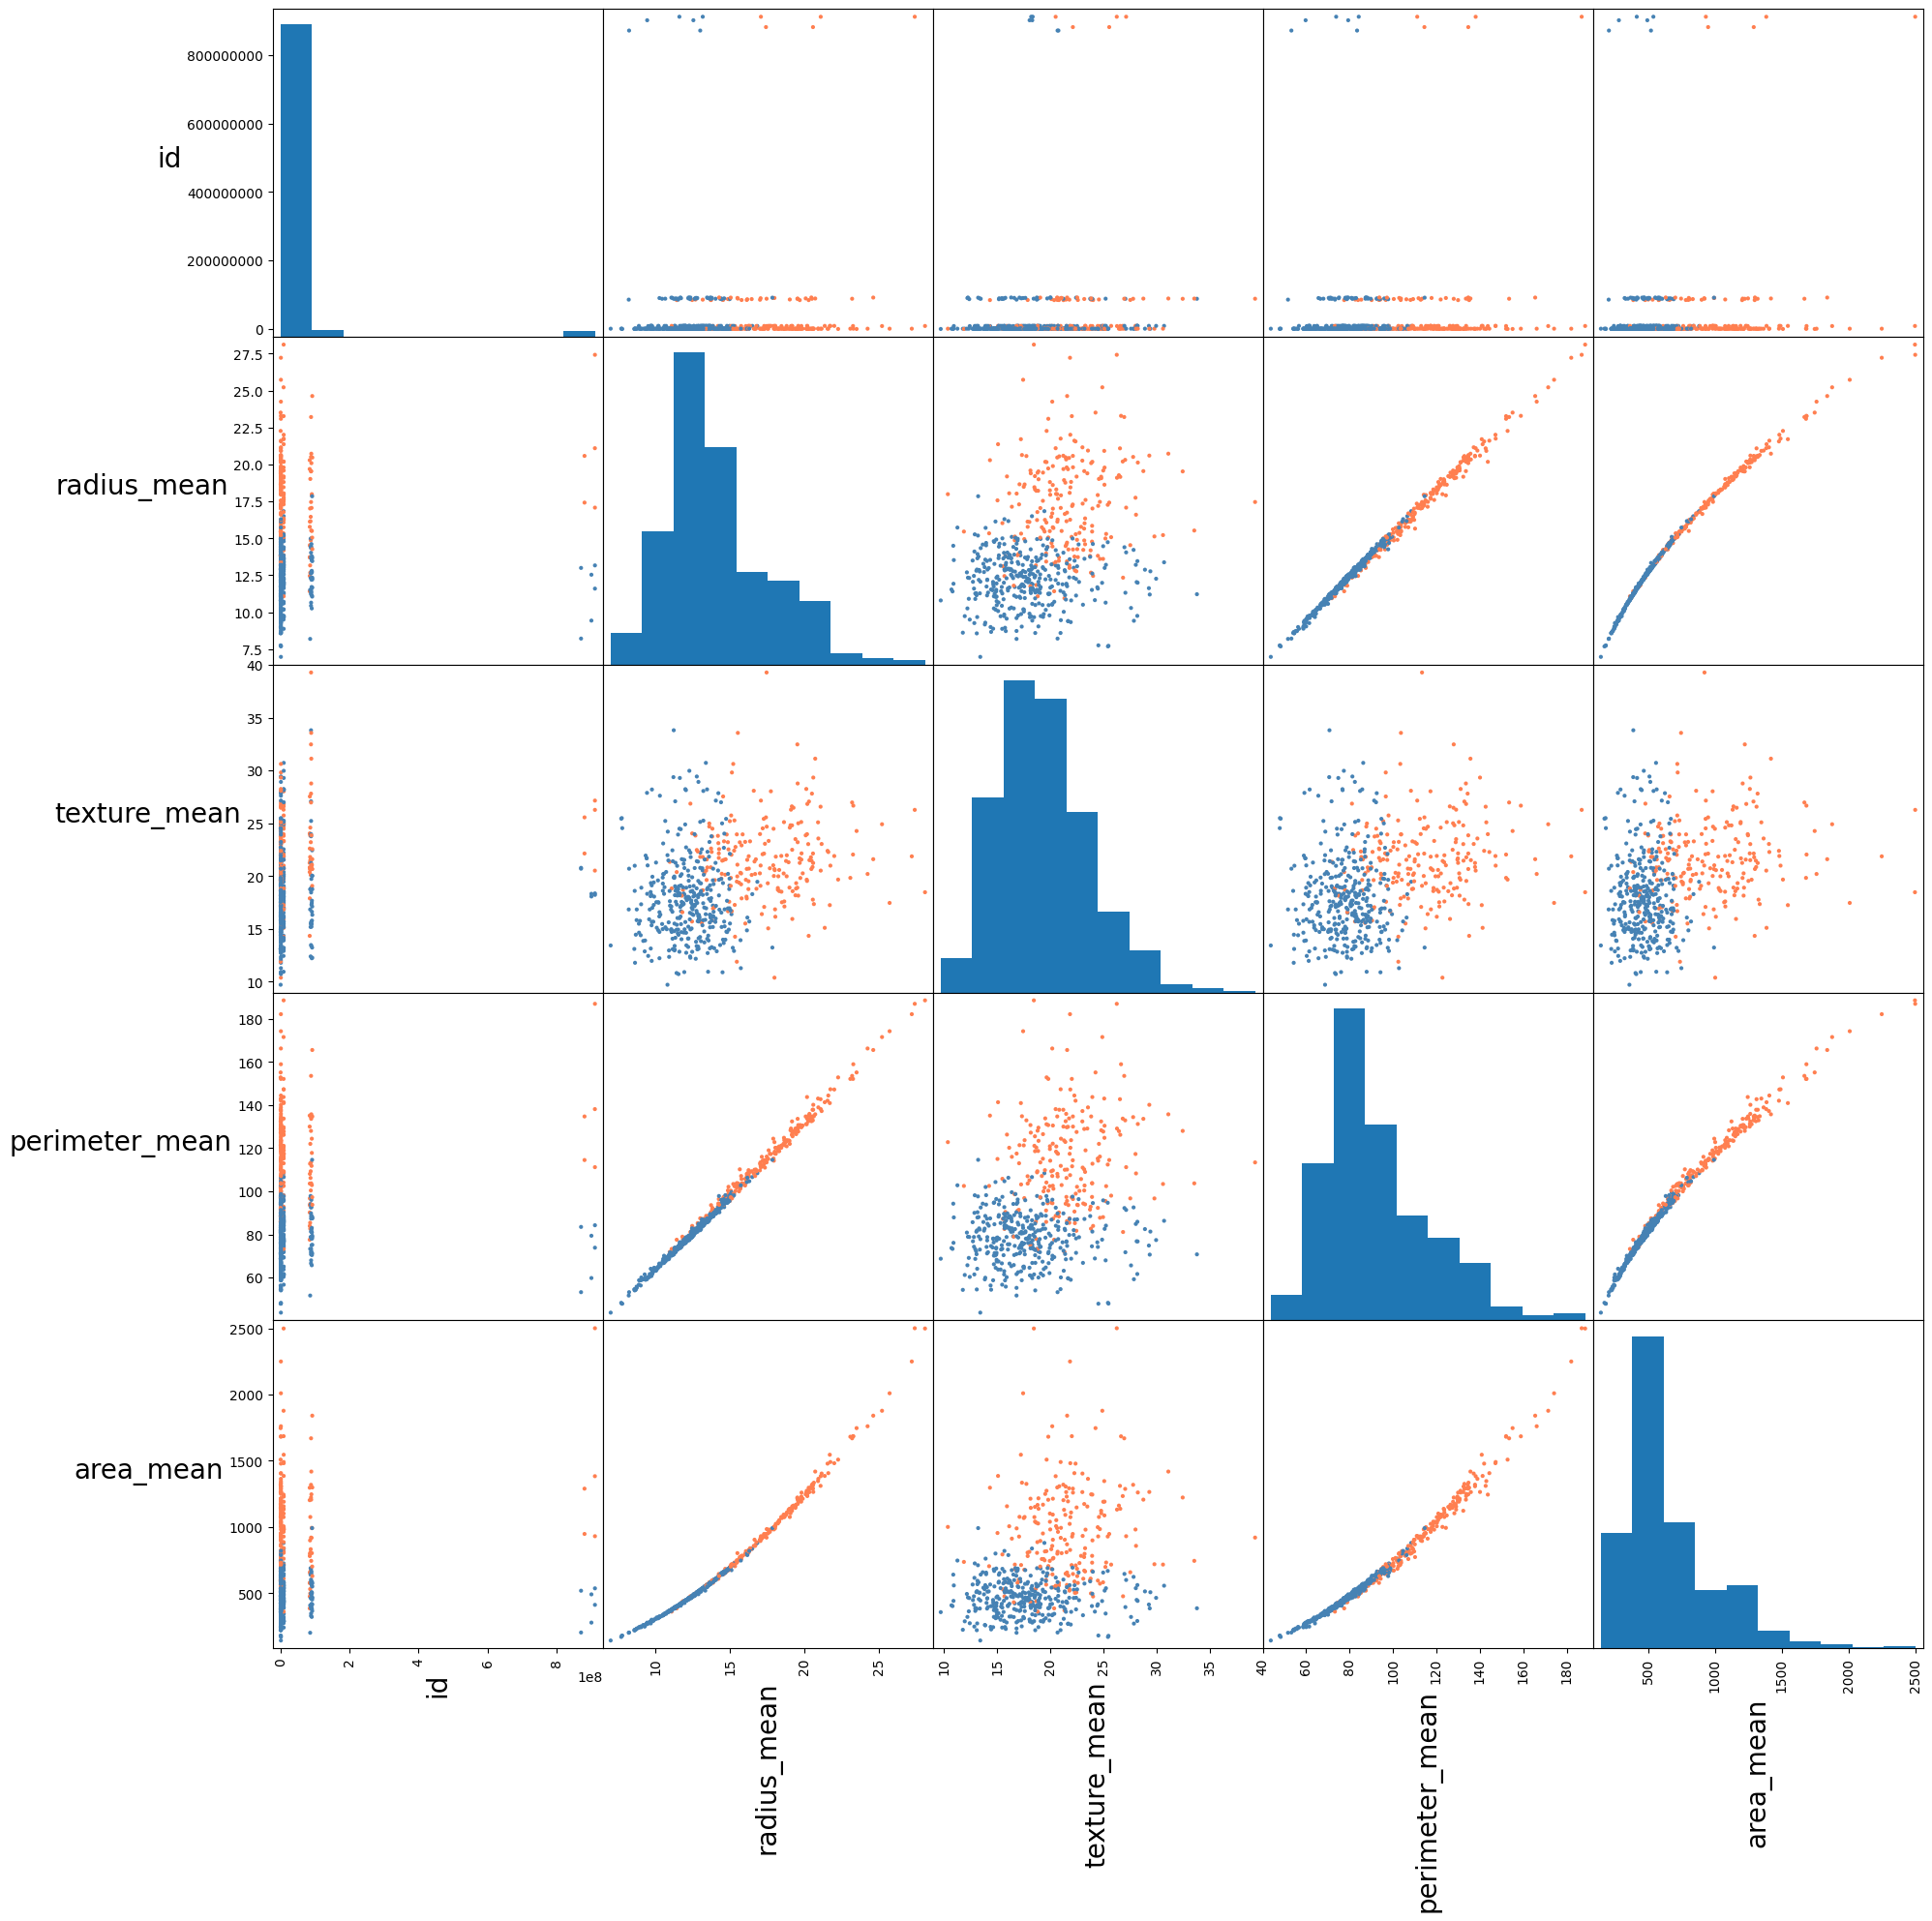

In [11]:
# Insert your comments and explanations

# Add your code or enhance the existing one


import matplotlib.pyplot as plt
# help: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html
color = cancer.diagnosis.map({'B':'steelblue', 'M':'coral'})
sm=pd.plotting.scatter_matrix(cancer.iloc[:, 0:6], c=color, alpha=1, figsize=(22,22));

# Change labels and tickslabels sizes:
# help: https://matplotlib.org/api/text_api.html#matplotlib.text.Text

#y ticklabels
a=[plt.setp(item.yaxis.get_majorticklabels(), 'size', 10) for item in sm.ravel()]
#x ticklabels
b=[plt.setp(item.xaxis.get_majorticklabels(), 'size', 10) for item in sm.ravel()]
#y labels
c=[plt.setp(item.yaxis.get_label(), 'size', 20) for item in sm.ravel()]
#x labels
d=[plt.setp(item.xaxis.get_label(), 'size', 20) for item in sm.ravel()]

for ax in plt.gcf().axes:
    plt.sca(ax)
    plt.xlabel(ax.get_xlabel(), rotation=90)
    plt.ylabel(ax.get_ylabel(), rotation=0, horizontalalignment='right')



---



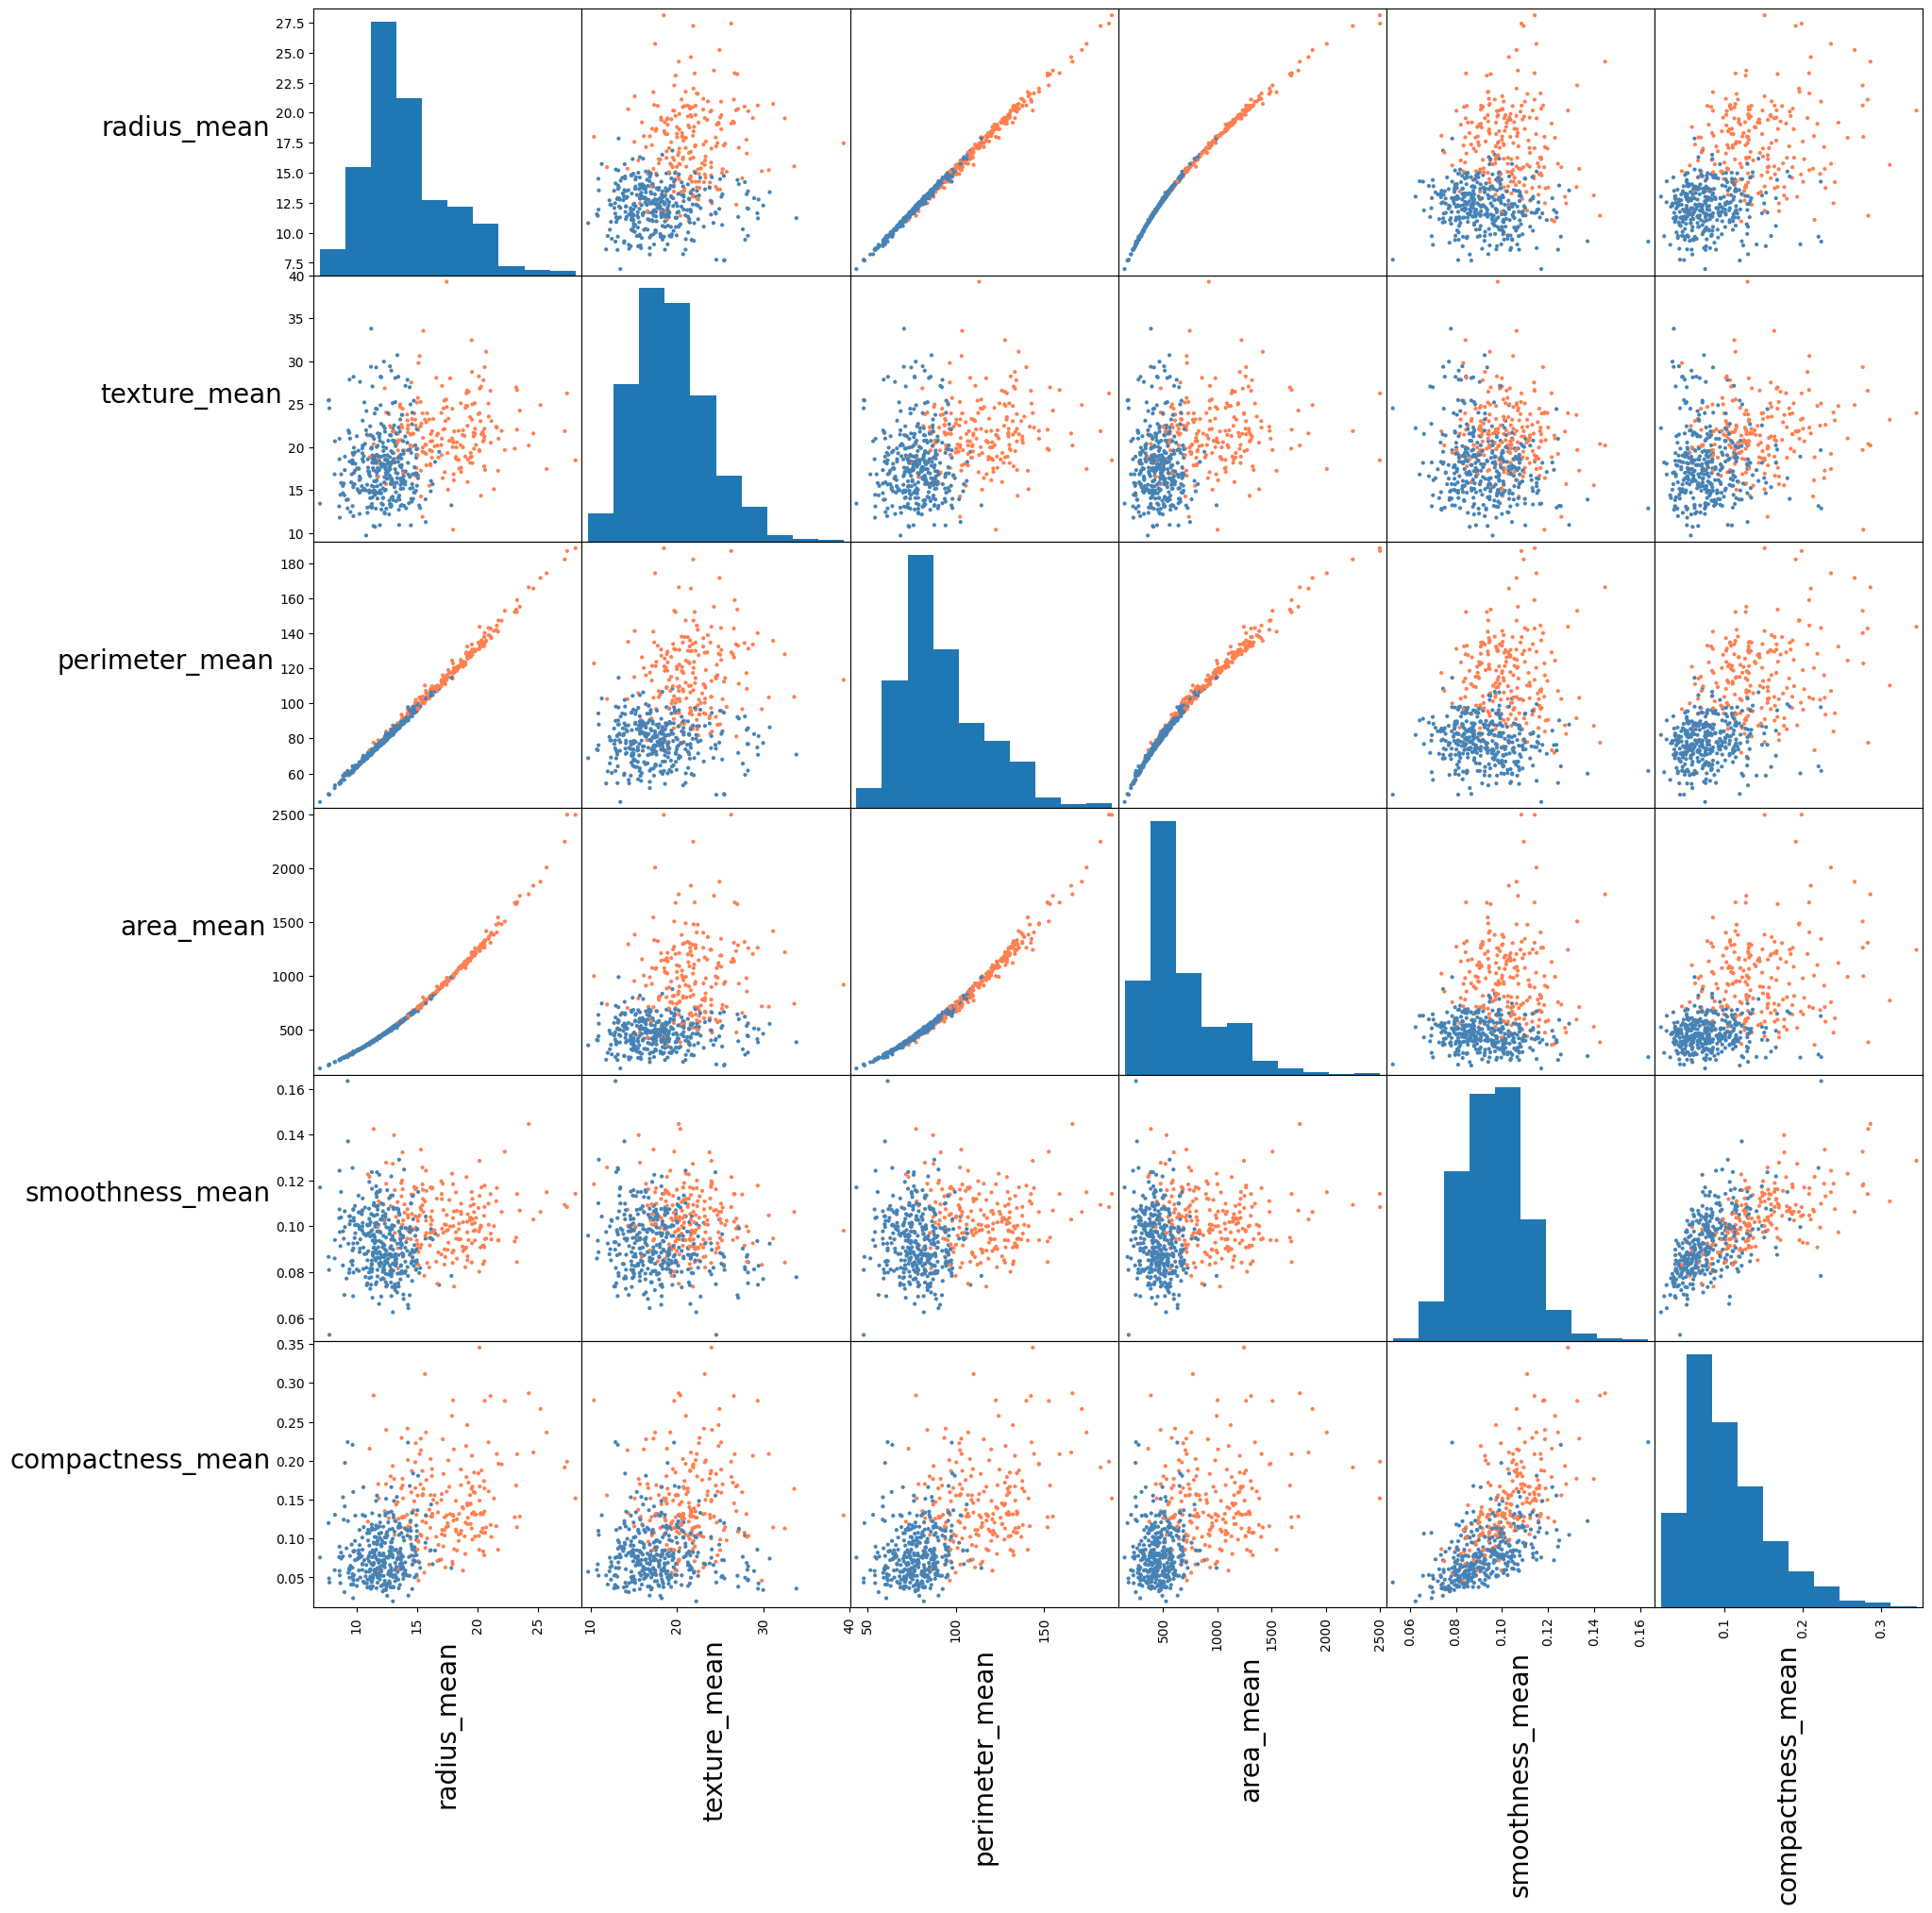

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'cancer' DataFrame is already loaded with the Breast Cancer Wisconsin (Diagnostic) dataset

# Map the 'diagnosis' column to colors: 'B' for benign (steelblue) and 'M' for malignant (coral)
color = cancer.diagnosis.map({'B': 'steelblue', 'M': 'coral'})

# Create a scatter matrix for selected features (excluding 'id')
# This helps to visualize the pairwise relationships between features
# help: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean']
sm = pd.plotting.scatter_matrix(cancer[features],  # Selecting relevant features
                                c=color,           # Color mapping for diagnosis
                                alpha=1,           # Transparency level
                                figsize=(22, 22),  # Figure size
                                diagonal='hist')   # Type of plot on the diagonal

# Change labels and tick labels sizes for better readability
# help: https://matplotlib.org/api/text_api.html#matplotlib.text.Text

# Adjust y-axis tick labels
a = [plt.setp(item.yaxis.get_majorticklabels(), 'size', 10) for item in sm.ravel()]
# Adjust x-axis tick labels
b = [plt.setp(item.xaxis.get_majorticklabels(), 'size', 10) for item in sm.ravel()]
# Adjust y-axis labels
c = [plt.setp(item.yaxis.get_label(), 'size', 20) for item in sm.ravel()]
# Adjust x-axis labels
d = [plt.setp(item.xaxis.get_label(), 'size', 20) for item in sm.ravel()]

# Rotate x-axis labels and align y-axis labels for better readability
for ax in plt.gcf().axes:
    plt.sca(ax)
    plt.xlabel(ax.get_xlabel(), rotation=90)
    plt.ylabel(ax.get_ylabel(), rotation=0, horizontalalignment='right')

# Display the scatter matrix
plt.show()


#### Correlation amongst <font color=green> continous</font> features:

Correlation amongst continous features:


<Axes: >

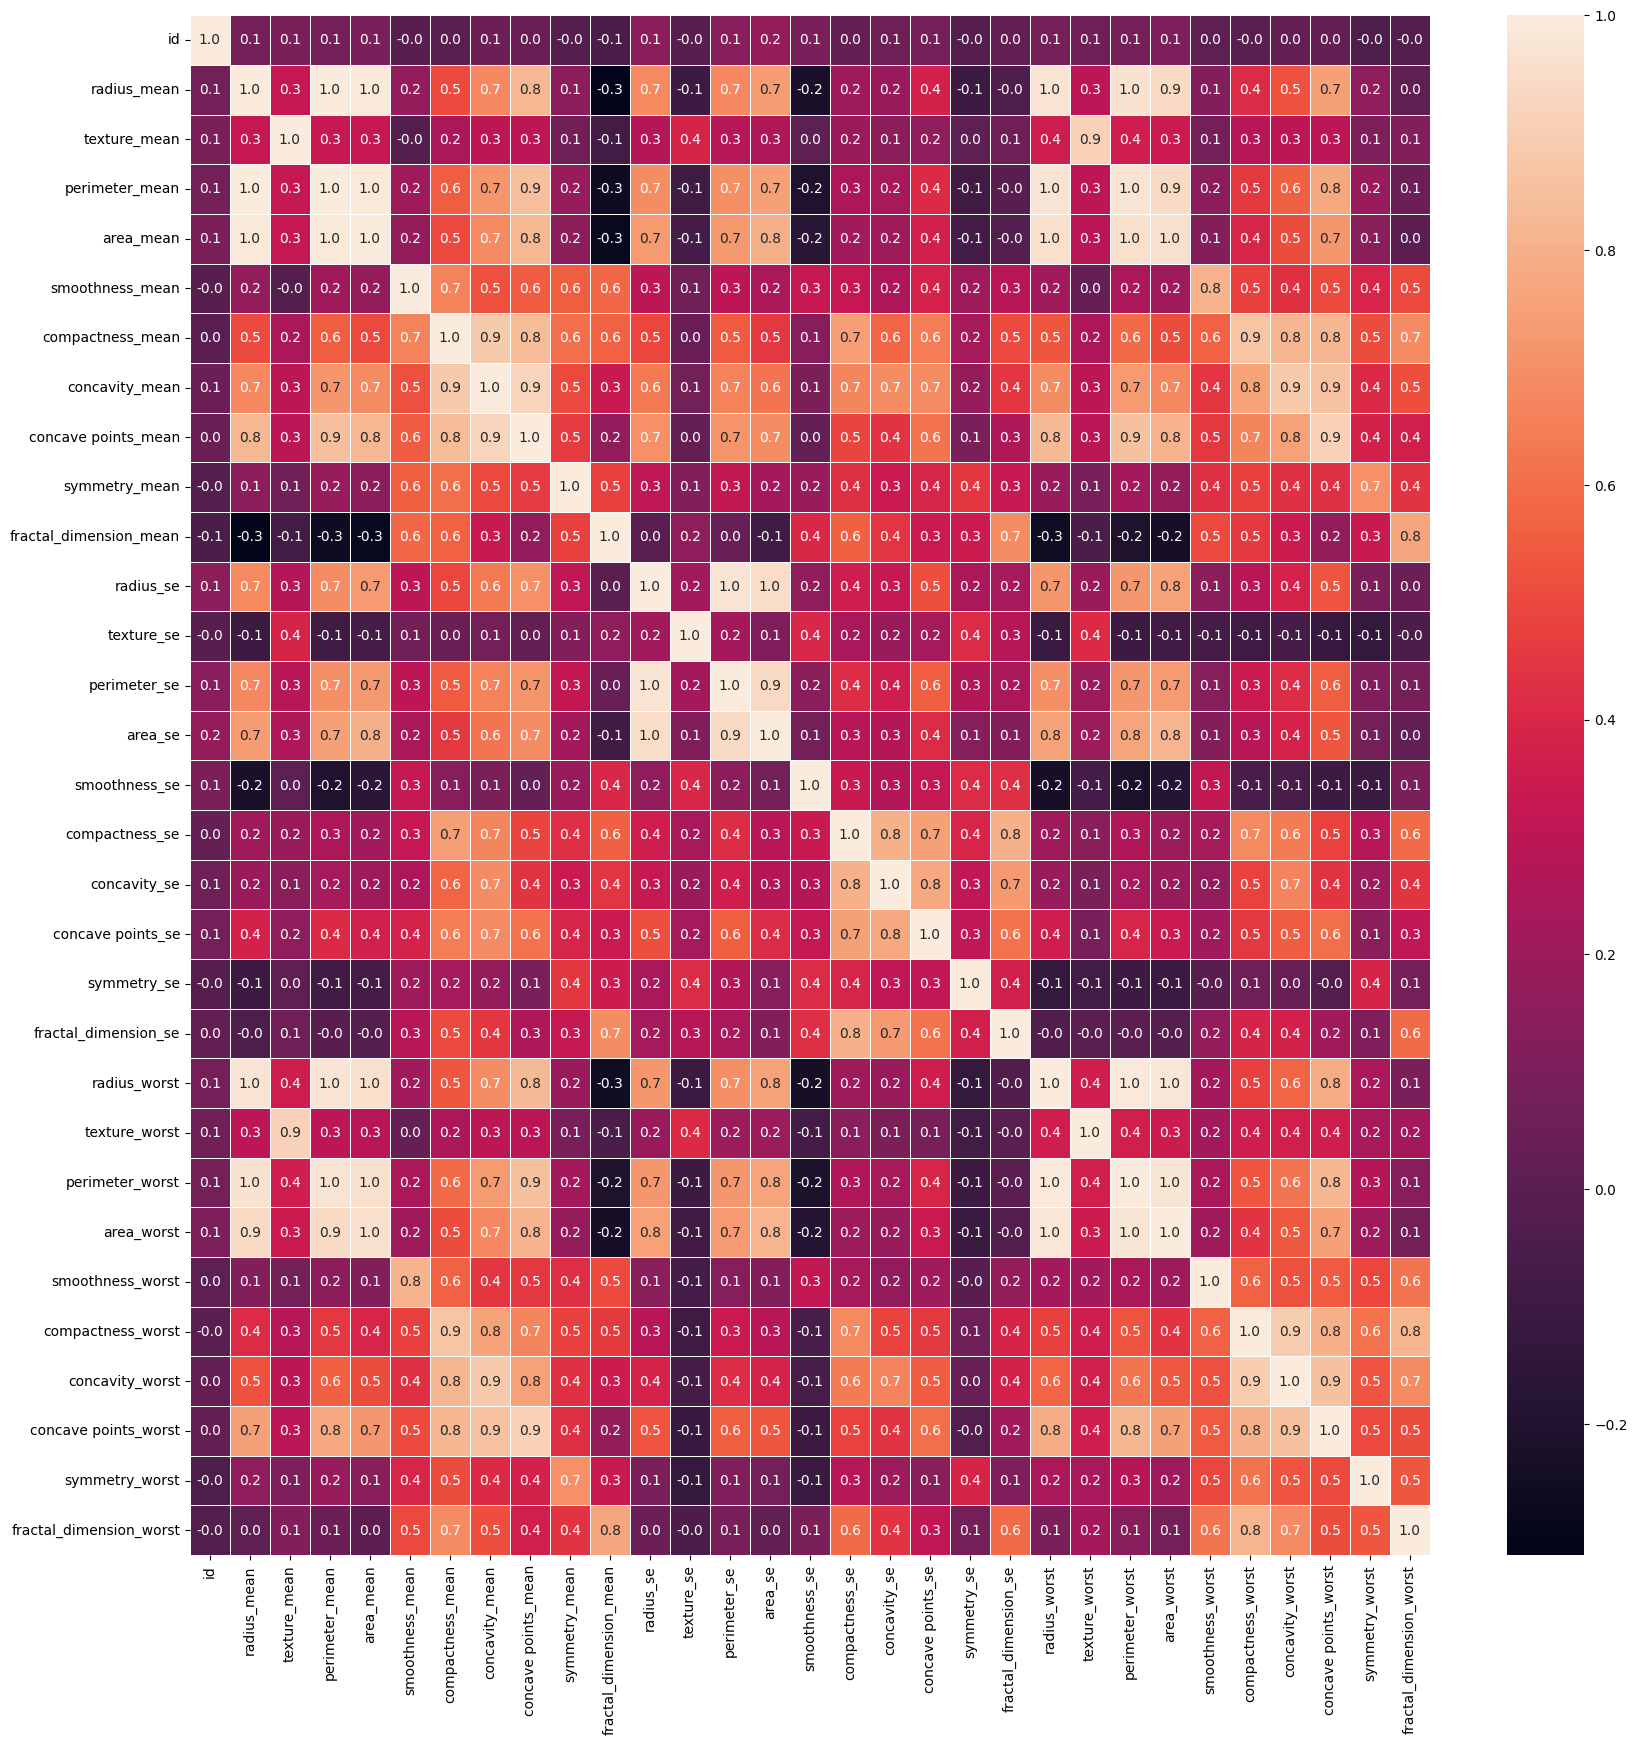

In [13]:
# Insert your comments and explanations

# Add your code or enhance the existing one


import seaborn as sns
input_features = cancer.drop(columns=['diagnosis'])
print ("Correlation amongst continous features:")
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(input_features.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)



---



#### Visualization of the response variable ('diagnosis')

Number of patients with malignant and benign tumours
Number of Benign:  357
Number of Malignant :  212


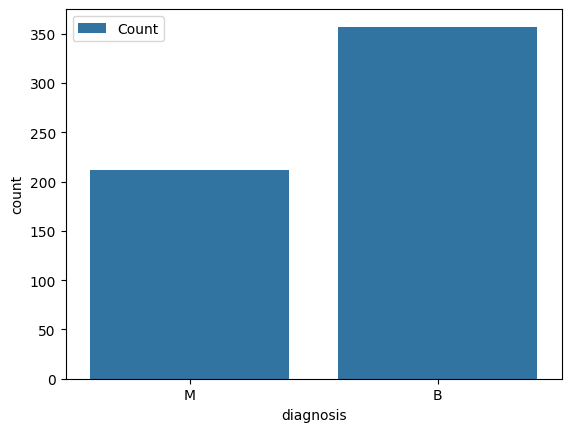

In [14]:
# Insert your comments and explanations

# Add your code or enhance the existing one

print("Number of patients with malignant and benign tumours")
ax = sns.countplot(x=cancer.diagnosis,label="Count")       # M = 212, B = 357
B, M = cancer.diagnosis.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

As we can see, this dataset is not as imbalanced as the "diabetes" dataset.



---



#### Boxplot of continuous variables regarding 'diagnosis'

In [15]:
# Insert your comments and explanations

# Add your code or enhance the existing one


# Transforming our data from wide to long format for our plots. Python command: DataFrame.melt([group variable],var_name,value_name)
cancer_plot = cancer.melt(['diagnosis'], var_name='cols',  value_name='vals')
cancer_plot.sort_values('diagnosis', inplace=True)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same 

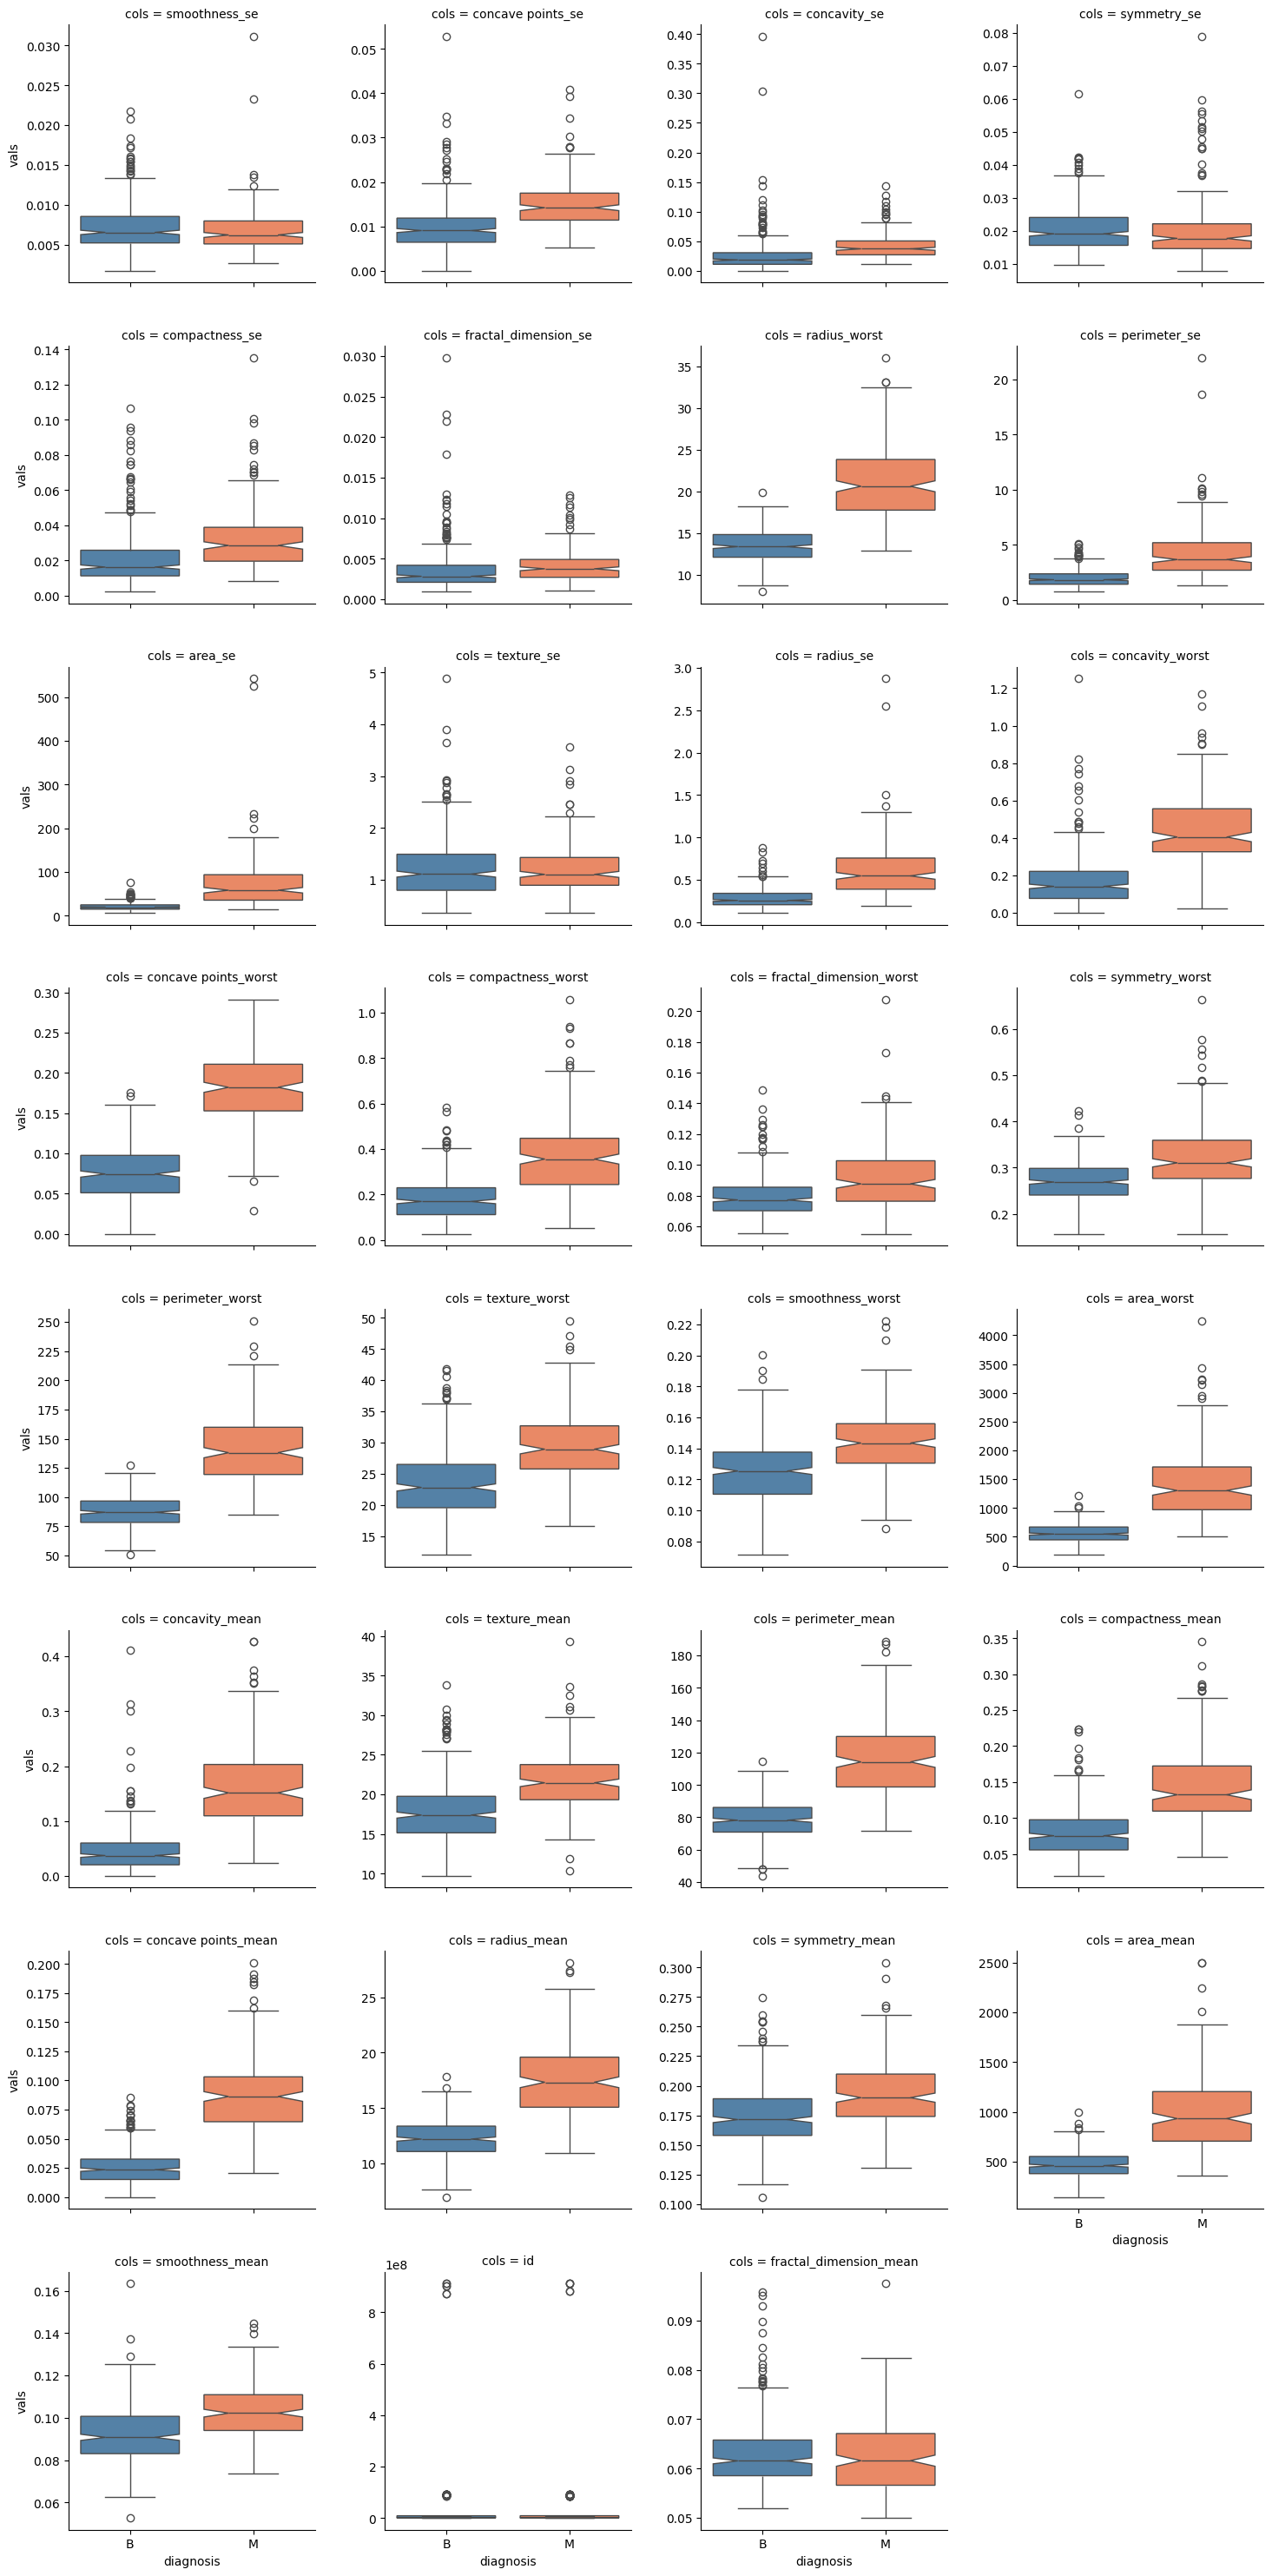

In [16]:
# Insert your comments and explanations

# Add your code or enhance the existing one


pal = dict(M="coral", B="steelblue")   # Palette of colours

# Box plot of all the continuous/numeric variables regarding 'readmissions'
p = sns.axisgrid.FacetGrid(cancer_plot, col='cols', palette=pal, sharey=False, col_wrap=4)
p = (p.map(sns.boxplot, 'diagnosis','vals', palette=pal, notch=True))
p.fig.set_size_inches(15,30)



---





---



# 4. Data Preparation: train and test set split


See below some suggestions:

## <font color='blue'> Split the data into training and test sets </font>

Now let's split the data into a training and test set. We will include the optional argument 'stratify = y' to preserve the ratio between diagnosis = B to diagnosis = M.

In [19]:
# Insert your comments and explanations

# Add your code or enhance the existing one

# 80% Training, 20% Test
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'cancer' DataFrame is already loaded with the Breast Cancer Wisconsin (Diagnostic) dataset

# Separate the features and the target variable
X = cancer.drop(columns=['diagnosis'])
y = cancer['diagnosis']

# Split the data into training (80%) and test (20%) sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=0)

# Check the distribution of the target variable in the training and test sets
print("Training set distribution:")
print(y_train.value_counts())

print("\nTest set distribution:")
print(y_test.value_counts())




Training set distribution:
diagnosis
B    285
M    170
Name: count, dtype: int64

Test set distribution:
diagnosis
B    72
M    42
Name: count, dtype: int64




---





---



# 5. Decision Trees
Decision Trees involve segmenting the feature space (the space of our predictor variables) into a number of different regions. The method can be used for both regression (predicting numeric response variable) and classification (classifying a categorical response variable). As the set of rules splitting the feature space into segments, this process can be summarised into a hierarchy of if/else statements in the form of a tree, these types of approaches are known as decision tree methods. Check the documentation to get familiar with [Decision Trees](https://scikit-learn.org/stable/modules/tree.html).

We will use tree methods to predict cancer diagnosis, which is a classification task.



---



## 5.1 Growing a simple decision tree
Beginning with what is known as the *root node*, the node containing the entire dataset, we split the data based on the feature that provides the most information about the response variable. The split is achieved by using a *test*. The form of the test depends on the data type of the chosen feature.
* If the feature of choice is continuous, the test will be of the form $X_i > a$, where $a$ is some constant. In other words, the tests that are used on continuous data are of the form 'is feature $X$ value larger than the value $a$?'.
* If the feature is categorical, the test will be $X_i = c$, where $c$ is one of the levels of the categorical variable. In other words, the tests that are used on categorical data are of the form 'is feature i of the same level as $c$?'. <p>

After assessing the test, the result will be two *children nodes*, one node being for all the data that satisfy the root node test and one node for all data points that do not satisfy the root node test.<p>
    We then continue this process of finding informative rules and splitting the data, resulting in a tree of nodes. The nodes in which we assign a value to the given observations are known as *leaf nodes*.



---



## 5.2 Regularization: Avoiding over-fitting - pruning the tree

We used Ridge and Lasso to avoid over-fitting in the case of linear models. We can't use these techniques here. So, what shall we do?

If we allow the process of testing and splitting to continue indefinitely, we will have a tree with every leaf node being *pure*. *Pure* means that there are only data points of a single class label in the final leaf node. More often than not, such a tree will be very complex and highly over-fitted to the training data. There are two common methods to prevent over-fitting:

1. **Pre-pruning**: Preventing over-fitting prior to the creation of a tree. Common criteria for pre-pruning includes limiting the maximum depth of the tree, limiting the maximum number of leaves, or placing a minimum size constraint on the nodes that must be satisfied for a split to occur. Is this familiar? How shall we determine these values, for example, the maximum depth of the tree? Yes, correct, you already know that these are hyperparameters and as such, they are set up by the user and they can be tuned if we wish to do so.

2. **Post-pruning**: Removing over-fitted leaf nodes after the creation of the tree. This is commonly referred to as "pruning". <p>

Decision trees in scikit-learn are implemented in the **DecisionTreeRegressor** and **DecisionTreeClassifier** classes. **scikit-learn** only implements pre-pruning, not post-pruning.



---



## 5.3 Create a decision tree with no pruning

We will create a decision tree with no pruning. We will see that some of the nodes will have only 1 sample. Calculate accuracy and other scores.


See below some suggestions:

Read [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [20]:
# Insert your comments and explanations

# Add your code or enhance the existing one



from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [21]:
# Insert your comments and explanations

# Add your code or enhance the existing one


simple_decision_tree = DecisionTreeClassifier(random_state=0)
simple_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [22]:
# Insert your comments and explanations

# Add your code or enhance the existing one


print("Accuracy on training set: {:.3f}".format(simple_decision_tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(simple_decision_tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.930




---



### 5.3.1 Confusion Matrices and Classification Reports

See below some suggestions:

In [23]:
# Insert your comments and explanations

# Add your code or enhance the existing one


from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred_train = simple_decision_tree.predict(X_train)
y_pred_test = simple_decision_tree.predict(X_test)


[Text(0, 0.5, 'M'), Text(0, 1.5, 'B')]

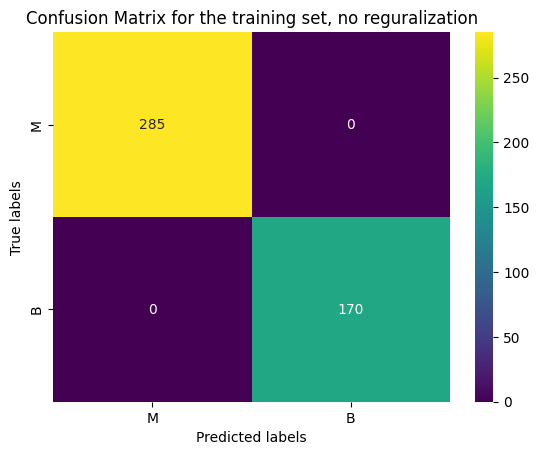

In [24]:
# Insert your comments and explanations

# Add your code or enhance the existing one


# Confusion Matrix for the training set
cm_train = metrics.confusion_matrix(y_true = y_train, y_pred = y_pred_train)

# Visualising the confusion matrix
ax= plt.subplot()
sns.heatmap(cm_train, annot=True, fmt='.0f', ax= ax, cmap="viridis")

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix for the training set, no reguralization');
ax.xaxis.set_ticklabels(['M', 'B']); ax.yaxis.set_ticklabels(['M', 'B'])

[Text(0, 0.5, 'M'), Text(0, 1.5, 'B')]

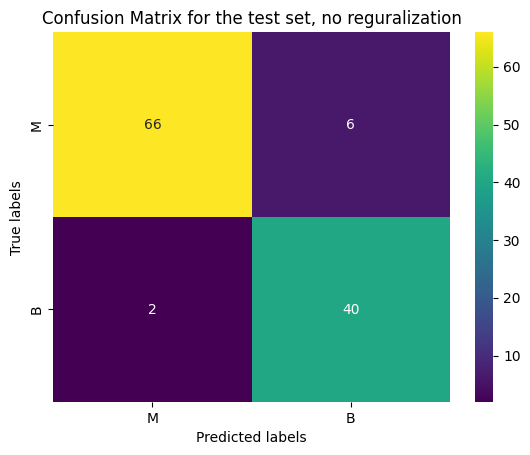

In [25]:

# Insert your comments and explanations

# Add your code or enhance the existing one


# Confusion Matrix for the test set
cm_test = metrics.confusion_matrix(y_true = y_test, y_pred = y_pred_test)

# Visualising the confusion matrix
ax= plt.subplot()
sns.heatmap(cm_test, annot=True, fmt='.0f', ax= ax, cmap="viridis")

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix for the test set, no reguralization');
ax.xaxis.set_ticklabels(['M', 'B']); ax.yaxis.set_ticklabels(['M', 'B'])



---



In [26]:
# Insert your comments and explanations

# Add your code or enhance the existing one


from sklearn.metrics import classification_report

print("*********************************************************")
print("Classification Report for the training set, no regularization")
print()
print(classification_report(y_train, y_pred_train))
print("*********************************************************")



*********************************************************
Classification Report for the training set, no regularization

              precision    recall  f1-score   support

           B       1.00      1.00      1.00       285
           M       1.00      1.00      1.00       170

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

*********************************************************


In [27]:
# Insert your comments and explanations

# Add your code or enhance the existing one


print("*********************************************************")
print("Classification Report for the test set, no regularization")
print()
print(classification_report(y_test, y_pred_test))
print("*********************************************************")



*********************************************************
Classification Report for the test set, no regularization

              precision    recall  f1-score   support

           B       0.97      0.92      0.94        72
           M       0.87      0.95      0.91        42

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

*********************************************************




---



### 5.3.2 Visualization

See [graphviz documentationn](https://graphviz.readthedocs.io/en/stable/) for install instruction if you are running a Python version < 3.7

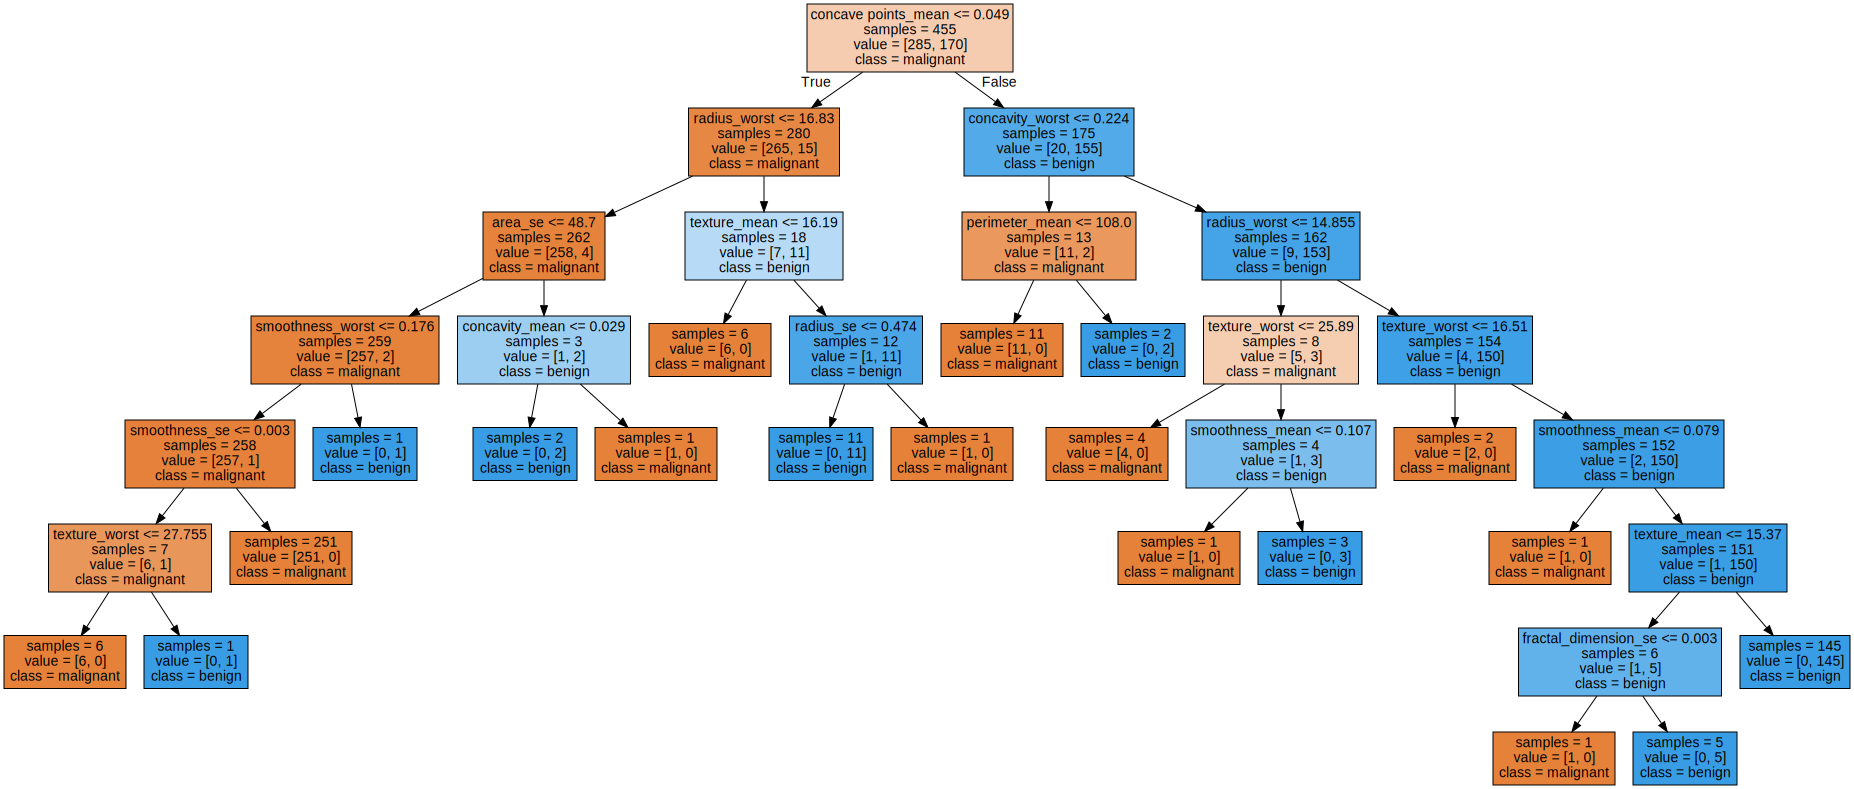

In [28]:
# Insert your comments and explanations

# Add your code or enhance the existing one


from sklearn.tree import export_graphviz
export_graphviz(simple_decision_tree, out_file='tree.dot', class_names=["malignant", "benign"],
                feature_names=X.columns, impurity=False, filled=True)

import graphviz
import os

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)



---



## 5.4 Pre-pruning a tree
As mentioned previously, scikit-learn only implements pre-pruning, not post-pruning, so we will only demonstrate how pre-pruning works.<p>
    Now let’s apply pre-pruning to the tree, which will stop growing the tree before we perfectly fit it to the training data.



---



### <font color='blue'> Set the maximum depth equal to 3, meaning only 3 consecutive splits can be made. Fit the model and print the accuracy on the training and test set. </font>

In [29]:
# Insert your comments and explanations

# Add your code or enhance the existing one

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Write Python Code here

decision_tree_max_depth3 = DecisionTreeClassifier(max_depth=3, random_state=0)
decision_tree_max_depth3.fit(X_train, y_train)

# Calculating and printing accuracy
train_accuracy = decision_tree_max_depth3.score(X_train, y_train)
test_accuracy = decision_tree_max_depth3.score(X_test, y_test)
print("Accuracy on training set with max depth 3: {:.3f}".format(train_accuracy))
print("Accuracy on test set with max depth 3: {:.3f}".format(test_accuracy))


Accuracy on training set with max depth 3: 0.976
Accuracy on test set with max depth 3: 0.956




---



### 5.4.1 Confusion Matrices and classification reports

In [44]:
# Predicting on the training and test sets
y_pred_train_pruned = decision_tree_max_depth3.predict(X_train)
y_pred_test_pruned = decision_tree_max_depth3.predict(X_test)


[Text(0, 0.5, 'B'), Text(0, 1.5, 'M')]

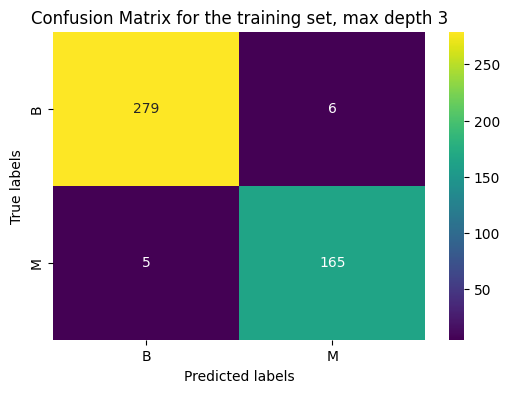

In [45]:
# Confusion Matrix for the training set
cm_train_pruned = confusion_matrix(y_train, y_pred_train_pruned)

# Visualising the confusion matrix for the training set
ax = plt.subplot()
sns.heatmap(cm_train_pruned, annot=True, fmt='.0f', ax=ax, cmap="viridis")
# Labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for the training set, max depth 3')
ax.xaxis.set_ticklabels(['B', 'M'])
ax.yaxis.set_ticklabels(['B', 'M'])

[Text(0, 0.5, 'B'), Text(0, 1.5, 'M')]

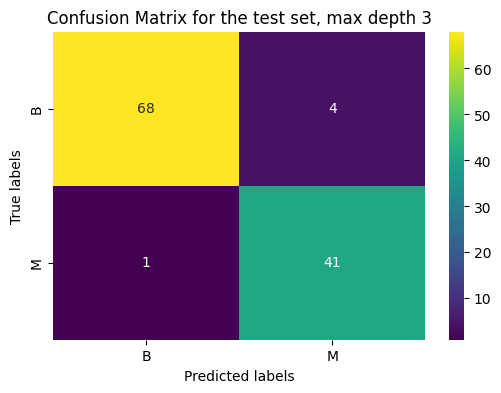

In [46]:
# Confusion Matrix for the test set
cm_test_pruned = confusion_matrix(y_test, y_pred_test_pruned)

# Visualising the confusion matrix for the test set
ax = plt.subplot()
sns.heatmap(cm_test_pruned, annot=True, fmt='.0f', ax=ax, cmap="viridis")
# Labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for the test set, max depth 3')
ax.xaxis.set_ticklabels(['B', 'M'])
ax.yaxis.set_ticklabels(['B', 'M'])



---



In [35]:
# Classification Report for the training set
print("*********************************************************")
print("Classification Report for the training set, max depth 3")
print()
print(classification_report(y_train, y_pred_train_pruned))
print("*********************************************************")

*********************************************************
Classification Report for the training set, max depth 3

              precision    recall  f1-score   support

           B       0.98      0.98      0.98       285
           M       0.96      0.97      0.97       170

    accuracy                           0.98       455
   macro avg       0.97      0.97      0.97       455
weighted avg       0.98      0.98      0.98       455

*********************************************************


In [36]:
# Classification Report for the test set
print("*********************************************************")
print("Classification Report for the test set, max depth 3")
print()
print(classification_report(y_test, y_pred_test_pruned))
print("*********************************************************")

*********************************************************
Classification Report for the test set, max depth 3

              precision    recall  f1-score   support

           B       0.99      0.94      0.96        72
           M       0.91      0.98      0.94        42

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

*********************************************************




---





---



### 5.4.2 Visualisation

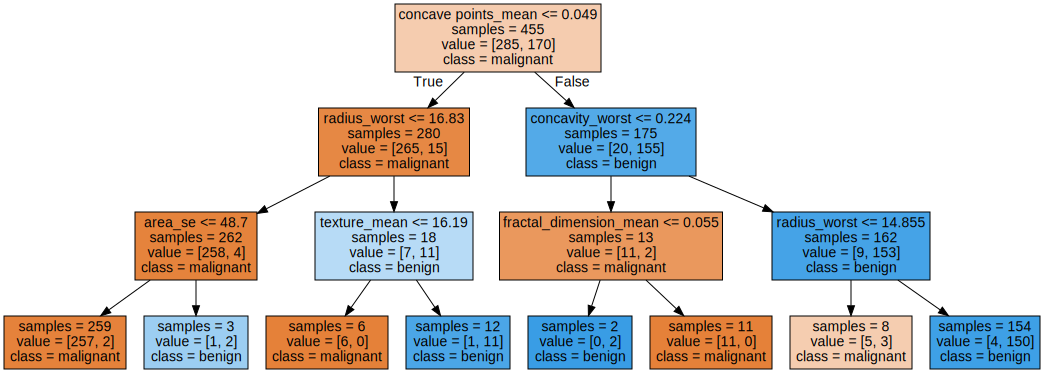

In [37]:
# Visualization of the pruned decision tree
from sklearn.tree import export_graphviz
import graphviz

# Exporting the pruned tree to a .dot file
export_graphviz(decision_tree_max_depth3, out_file='pruned_tree.dot', class_names=["malignant", "benign"],
                feature_names=X.columns, impurity=False, filled=True)

# Reading the .dot file and visualizing the tree
with open('pruned_tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)




The visualization of the tree allows for an intuitive interpretation on how the algorithm classifies its data.<p>



---



### <font color='blue'> Did we improve our accuracy / precision-recall? Why? </font>

<b> Write your answer here:</b>
#####################################################################################################################



#####################################################################################################################



---



### 5.4.3 Feature importance
There are some useful properties that we can derive to summarise the workings of the tree. A common example is *feature importance*, which as its name suggests, numerically rates the importance each feature plays in the decision making process of the tree. It is a number between 0 and 1, with the sum of all feature importances equalling to 1.

In [38]:
# Insert your comments and explanations

# Add your code or enhance the existing one


# Creating DataFrame with the features names and features importance
F_importance = pd.concat([pd.DataFrame(X.columns,columns=['Features']),
                  pd.DataFrame(np.transpose(decision_tree_max_depth3.feature_importances_),columns=['Feature Importance'])],
                 axis = 1)

# Sorting new DataFrame by feature importance (Sort Descending)
F_importance = F_importance.sort_values(by='Feature Importance', ascending=False)
F_importance

,Features,Feature Importance
8,concave points_mean,0.767648
21,radius_worst,0.089646
27,concavity_worst,0.077431
2,texture_mean,0.034599
10,fractal_dimension_mean,0.017421
14,area_se,0.013256
20,fractal_dimension_se,0.000000
22,texture_worst,0.000000
23,perimeter_worst,0.000000
0,id,0.000000




---



In [39]:
import matplotlib.pyplot as plt

In [40]:
# Insert your comments and explanations

# Add your code or enhance the existing one


def plot_feature_importances(model):
    plt.rcParams["figure.figsize"] = (7,8)
    # Sort feature importances in ascending order
    indices = np.argsort(model.feature_importances_)

    # Rearrange feature names so they match the sorted feature importances
    columns_name = [X.columns[i] for i in indices]

    # Create plot
    plt.figure()
    plt.title("Feature Importance")
    plt.xlabel("Feature")
    plt.ylabel("Feature Importance")
    plt.barh(range(X.shape[1]), model.feature_importances_[indices])
    plt.yticks(range(X.shape[1]), columns_name)
    plt.show()

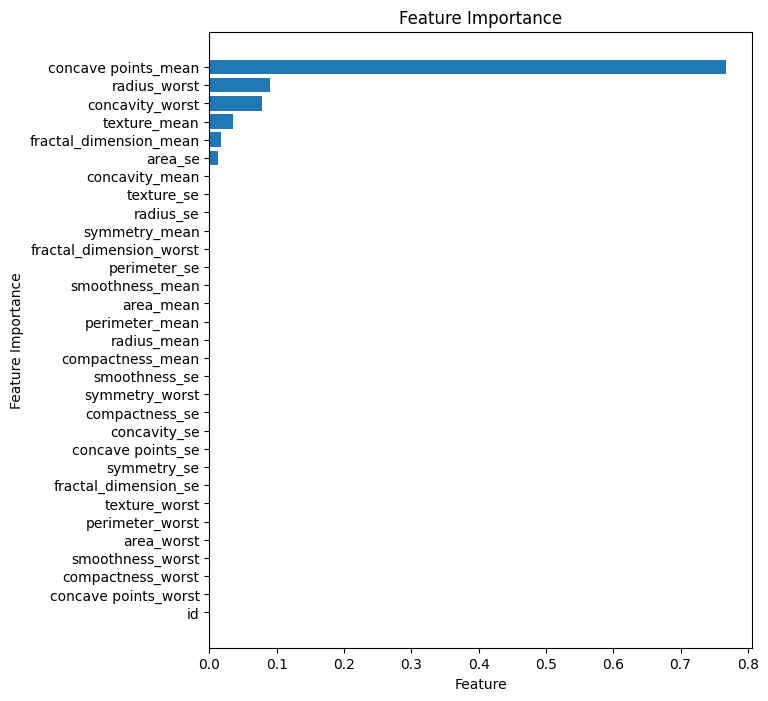

In [41]:
plot_feature_importances(decision_tree_max_depth3)



---



This is not an effective visualization, as we have so many features. The solution is to remove all features that are of very low importance. We will only select the most important features, which are the first six.

In [42]:
# Insert your comments and explanations

# Add your code or enhance the existing one


def plot_feature_importances(model):
    plt.rcParams["figure.figsize"] = (6,4)
    #locate indices of the features with feature importance greater than 0.01. Sort descending
    indices = np.argsort(decision_tree_max_depth3.feature_importances_)
    indices = indices[-6:]

    # Rearrange feature names so they match the sorted feature importances
    columns_name = [X.columns[i] for i in indices]

    #extract the number of features that have non-zero feature importance
    n_features = X.iloc[:,indices].shape[1]

    # Create plot
    plt.figure()
    plt.title("Feature Importance")
    plt.xlabel("Feature")
    plt.ylabel("Feature Importance")
    plt.barh(range(n_features), model.feature_importances_[indices])
    plt.yticks(range(n_features), columns_name)
    plt.show()

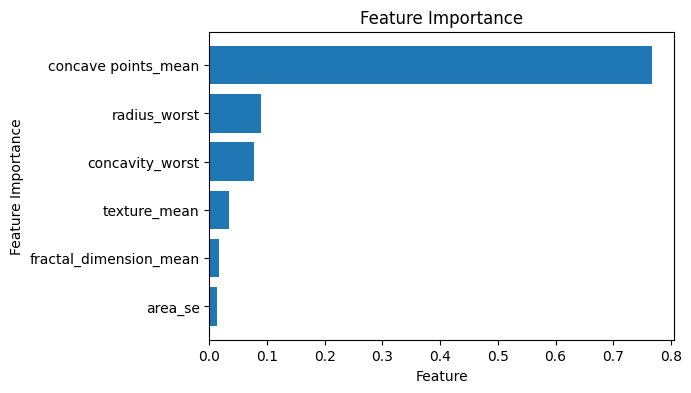

In [43]:
# Insert your comments and explanations

# Add your code or enhance the existing one


plot_feature_importances(decision_tree_max_depth3)

From the Introduction to machine learning with Python : a guide for data scientists by Andreas C. Müller and Sarah Guido: **"... if a feature has a low feature_importance, it doesn’t mean that this feature is uninformative. It only means that the feature was not picked by the tree, likely because another feature encodes the same information."**



---



## 5.5 Advantages/disadvantages of decision trees
**Advantages**:
* Easy interpretation and visualisation of decision rules. Particularly to non-experts.
* Very fast to train, and then predict.
* Invariant to scaling of the data. This removes the need for preprocessing such as the standardisation which was needed for the regularised logistic models.
* Are able to predict non-linear data.
* Can be used to determine feature importance.
* Further, provides automatic feature selection by only choosing the important features by which the data are split. This further reduces the need for preprocessing.
* Provides probability estimates. <p>

**Disadvantages**:
* Tendency to over-fit, even after pruning methods.
* Often outperformed by other models, including the ensemble methods utilising the basic decision tree, which we will discuss now.



---



To use cross-validation for hyperparameter tuning and obtain the best hyperparameters for a decision tree classifier, you can use GridSearchCV from scikit-learn. This will allow you to perform an exhaustive search over a specified parameter grid and select the best hyperparameters based on cross-validated performance.

## 5.6 test of Hyper-parameters

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Define the parameter grid
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the decision tree classifier
decision_tree = DecisionTreeClassifier(random_state=0)

In [48]:
# Setup the GridSearchCV
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=2)

In [49]:
# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters found: {best_params}")
print(f"Best cross-validation score: {best_score:.4f}")

Best parameters found: {'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation score: 0.9451


In [51]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_

test_accuracy = best_model.score(X_test, y_test)
print(f"Test set accuracy with best model: {test_accuracy:.4f}")

# Predicting on the training and test sets
y_pred_train_best = best_model.predict(X_train)
y_pred_test_best = best_model.predict(X_test)


Test set accuracy with best model: 0.9649


[Text(0, 0.5, 'B'), Text(0, 1.5, 'M')]

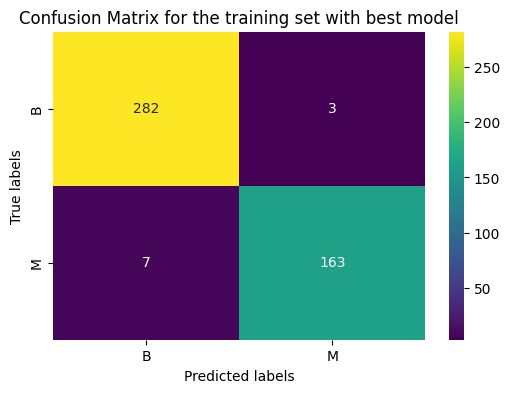

In [53]:
# Confusion Matrix for the training set
cm_train_best = confusion_matrix(y_train, y_pred_train_best)

# Visualising the confusion matrix for the training set
ax = plt.subplot()
sns.heatmap(cm_train_best, annot=True, fmt='.0f', ax=ax, cmap="viridis")
# Labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for the training set with best model')
ax.xaxis.set_ticklabels(['B', 'M'])
ax.yaxis.set_ticklabels(['B', 'M'])

[Text(0, 0.5, 'B'), Text(0, 1.5, 'M')]

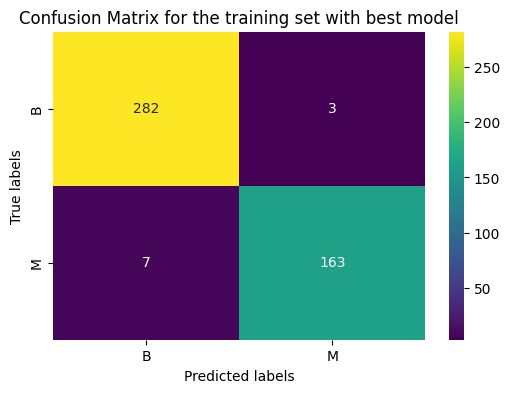

In [54]:
# Confusion Matrix for the training set
cm_train_best = confusion_matrix(y_train, y_pred_train_best)

# Visualising the confusion matrix for the training set
ax = plt.subplot()
sns.heatmap(cm_train_best, annot=True, fmt='.0f', ax=ax, cmap="viridis")
# Labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for the training set with best model')
ax.xaxis.set_ticklabels(['B', 'M'])
ax.yaxis.set_ticklabels(['B', 'M'])

In [56]:
# Classification Report for the training set
print("*********************************************************")
print("Classification Report for the training set with best model")
print()
print(classification_report(y_train, y_pred_train_best))
print("*********************************************************")

# Classification Report for the test set
print("*********************************************************")
print("Classification Report for the test set with best model")
print()
print(classification_report(y_test, y_pred_test_best))
print("*********************************************************")

*********************************************************
Classification Report for the training set with best model

              precision    recall  f1-score   support

           B       0.98      0.99      0.98       285
           M       0.98      0.96      0.97       170

    accuracy                           0.98       455
   macro avg       0.98      0.97      0.98       455
weighted avg       0.98      0.98      0.98       455

*********************************************************
*********************************************************
Classification Report for the test set with best model

              precision    recall  f1-score   support

           B       0.99      0.96      0.97        72
           M       0.93      0.98      0.95        42

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

********************************************************

## 5.7 Overfitting


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found: {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5}
Best cross-validation score: 0.9495
Test set accuracy with best model: 0.9035
*********************************************************
Classification Report for the training set with best model

              precision    recall  f1-score   support

           B       0.99      0.99      0.99       285
           M       0.98      0.98      0.98       170

    accuracy                           0.98       455
   macro avg       0.98      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455

*********************************************************
*********************************************************
Classification Report for the test set with best model

              precision    recall  f1-score   support

           B       0.97      0.88      0.92        72
           M       0.8

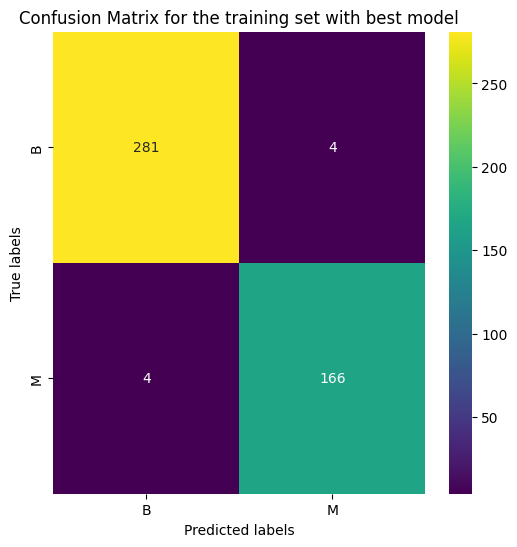

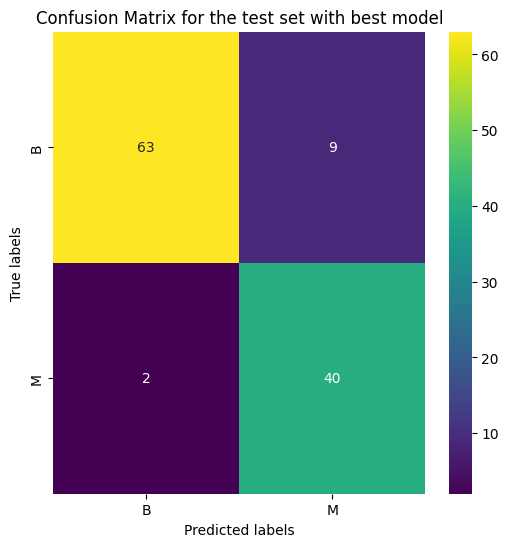

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the parameter grid
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize the decision tree classifier
decision_tree = DecisionTreeClassifier(random_state=0)

# Setup the GridSearchCV
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters found: {best_params}")
print(f"Best cross-validation score: {best_score:.4f}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_

test_accuracy = best_model.score(X_test, y_test)
print(f"Test set accuracy with best model: {test_accuracy:.4f}")

# Predicting on the training and test sets
y_pred_train_best = best_model.predict(X_train)
y_pred_test_best = best_model.predict(X_test)

# Confusion Matrix for the training set
cm_train_best = confusion_matrix(y_train, y_pred_train_best)

# Visualising the confusion matrix for the training set
plt.figure(figsize=(6, 6))
ax = plt.subplot()
sns.heatmap(cm_train_best, annot=True, fmt='.0f', ax=ax, cmap="viridis")
# Labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for the training set with best model')
ax.xaxis.set_ticklabels(['B', 'M'])
ax.yaxis.set_ticklabels(['B', 'M'])

# Confusion Matrix for the test set
cm_test_best = confusion_matrix(y_test, y_pred_test_best)

# Visualising the confusion matrix for the test set
plt.figure(figsize=(6, 6))
ax = plt.subplot()
sns.heatmap(cm_test_best, annot=True, fmt='.0f', ax=ax, cmap="viridis")
# Labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for the test set with best model')
ax.xaxis.set_ticklabels(['B', 'M'])
ax.yaxis.set_ticklabels(['B', 'M'])

# Classification Report for the training set
print("*********************************************************")
print("Classification Report for the training set with best model")
print()
print(classification_report(y_train, y_pred_train_best))
print("*********************************************************")

# Classification Report for the test set
print("*********************************************************")
print("Classification Report for the test set with best model")
print()
print(classification_report(y_test, y_pred_test_best))
print("*********************************************************")
